# Thompson Sampling

Solving Multi-Armed Bandit Problem. Attempting to find optimal machine through exploration and exploiting that machine as soon as possible

### Intuition

Each machine is given an equivalent expected return that is a random value from the distributions at the start of the algorithm. 

The machine goes through trial runs and the algorithm begins to construct a distribution from those trial runs for each ad. These distributions represent where we think the actual expected value might lie. We are creating an auxillary mechanism to solve the problem. We are recreating the possible ways that the ad was created.

Distribution tries to guess where the actual expected value is. We are NOT trying to guess what the actual distributions are. We are trying to mathematically represent what we think could be going on

We are creating a probabilistic approach to the problem. The UCB is discrete; it is either greater than the bound or not

Algorithm pulls or chooses any value that is in the distribution for each of the advertisments. The generates our own bandit configuration. It is an imaginary set of machines where the average actual expected return for each machine is the value that we pull from each distribution. 

We then choose to exploit the machine that has the highest expected return from the imaginary set. The algorithm will then calculate a value that is closer to the actual expected value from that machine or advertisment

This shifts our perception of the distribution for that machine which changes the perception of our problem since we have a better idea of the distribution. This completes a round

We then choose any value from each distribution which generates a new imaginary set of machines. We then exploit the machine with highest return and we calculate a value that is closer to the actual expected value

This shifts our perception of the distribution for the machine; completing a round. We repeat this process until we have refined distributions to the point were we are only choosing rounds that are from the machine with the highest expected return

## Import the Relevant Libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the Dataset

In [2]:
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
# Implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
# Number of times the ad had a reward of 1 for up to round N; creates a vector of d elements
# Have a value of 0 at the start since there are no elements left
numbers_of_rewards_1 = [0] * d
# Number of times the ad had a reward of 0 for up to round N; creates a vector of d elements
numbers_of_rewards_0 = [0] * d
# Initialize the total reward to 0 at the start
total_reward = 0
for n in range(0, N):
    # Initialize the ad to the first one
    ad = 0
    # Initialize a variable for the maximum for the random draws
    max_random = 0
    # For each ad 
    for i in range(0, d):
        # Create variable that corresponds to random draw. Find the random distribution of the betas. 
        # Gives us the number of times it has a reward of 1 plus 1 for each ad (Use of i)
        # and the number of times it has a reward of 0 plus 1 for each ad (Use of i)
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        # If the current random beta is larger than the largest random draw for each ad
        if random_beta > max_random:
            # Set that current random draw to the max random 
            max_random = random_beta
            # Update the ad in order to move to the next one
            ad = i
    # Add this add to the ads_selected list
    ads_selected.append(ad)
    # Get the actual reward for that round for that ad from the dataset
    reward = dataset.values[n, ad]
    # If the reward is 1
    if reward == 1:
        # Must increment the number of times that ad has reward 1 by 1 if the ad has a reward of 1
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    # If the ad has a reward of 0
    else:
        # Must increment the number of times that ad has reward 0 by 1 if the ad has a reward of 
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    # Update the total reward by adding the reward for that ad
    total_reward = total_reward + reward
# The Thompson Sampling algorithm has a higher total reward than UCB
print("The total reward for this Thompson Sampling algorithm is", total_reward)

2609


## Visualizing the Results in a Histogram

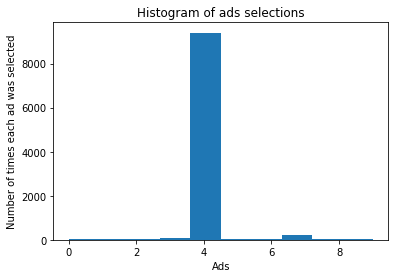

In [4]:
# Visualising the results - Histogram
# Quickly exploits the optimal ad since it dominates the number of times it was selected
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()